In [26]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

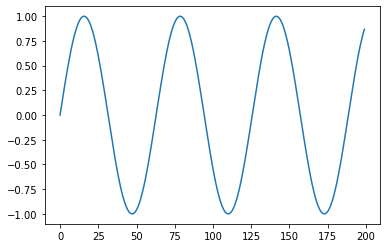

In [22]:
series = np.sin(0.1 * np.arange(200))

plt.plot(series)
plt.show()

In [3]:
series[0:0+10] # range 는 0부터 시작하기 때문에, 0~10이 되어서 0~9 까지 출력된다. 

array([0.        , 0.09983342, 0.19866933, 0.29552021, 0.38941834,
       0.47942554, 0.56464247, 0.64421769, 0.71735609, 0.78332691])

In [4]:
T = 10 #과거데이터 10개
X = []
Y =[]
for t in range(len(series) - T):
    x = series[t:t+T]
    y = series[t+T] #10번째 데이터만 저장함. 
    X.append(x)
    Y.append(y)
    


In [5]:
print(X[0],"------------Y:",Y[0])
print(X[1])

[0.         0.09983342 0.19866933 0.29552021 0.38941834 0.47942554
 0.56464247 0.64421769 0.71735609 0.78332691] ------------Y: 0.8414709848078965
[0.09983342 0.19866933 0.29552021 0.38941834 0.47942554 0.56464247
 0.64421769 0.71735609 0.78332691 0.84147098]


In [6]:
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape",Y.shape)

#10개데이터가 feature로 들어가서 학습이 됨. 

X.shape (190, 10) Y.shape (190,)


In [7]:
# autoregressive linear model

i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.1))
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [8]:
#190 -> 0~95
r=model.fit(X[:-N//2], Y[:-N//2], epochs=100, validation_data=((X[-N//2:], Y[-N//2:])))

Train on 95 samples, validate on 95 samples
Epoch 1/100
95/95 [==============================] - 0s 1ms/sample - loss: 0.6302 - val_loss: 0.3037
Epoch 2/100
95/95 [==============================] - 0s 94us/sample - loss: 0.2119 - val_loss: 0.0515
Epoch 3/100
95/95 [==============================] - 0s 94us/sample - loss: 0.0739 - val_loss: 0.0224
Epoch 4/100
95/95 [==============================] - 0s 105us/sample - loss: 0.0450 - val_loss: 0.1042
Epoch 5/100
95/95 [==============================] - 0s 105us/sample - loss: 0.0759 - val_loss: 0.0511
Epoch 6/100
95/95 [==============================] - 0s 116us/sample - loss: 0.0546 - val_loss: 0.0838
Epoch 7/100
95/95 [==============================] - 0s 105us/sample - loss: 0.0503 - val_loss: 0.0432
Epoch 8/100
95/95 [==============================] - 0s 115us/sample - loss: 0.0329 - val_loss: 0.0172
Epoch 9/100
95/95 [==============================] - 0s 116us/sample - loss: 0.0080 - val_loss: 0.0069
Epoch 10/100
95/95 [=============

([<matplotlib.axis.YTick at 0x273d8287548>],
 <a list of 1 Text yticklabel objects>)

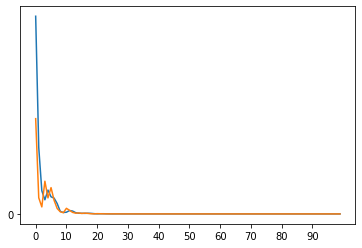

In [9]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0,1))

In [10]:
validation_target = Y[-N//2:]
validation_predict = []

i = -N//2
while len(validation_predict) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1))[0,0] # 1X1 -> scalar

    i += 1
    validation_predict.append(p)

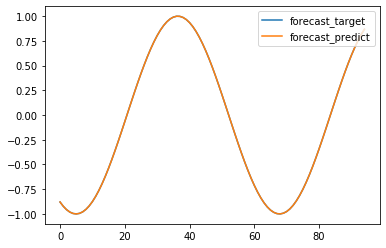

In [11]:
plt.plot(validation_target, label = 'forecast_target')
plt.plot(validation_predict, label = 'forecast_predict')

plt.legend()

#절반만가지고 학습해도 다 잘 채워져서 겹쳐진 것 처럼 보임. 

In [19]:
#correct
validation_target = Y[-N//2:]
validation_predict = []

last_x = X[-N//2]


i = -N//2
print("X[95]=", X[-N//2])
print("X[96]=", X[-N//2 +1])

while len(validation_predict) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0] # 1X1 -> scalar
    
    validation_predict.append(p)
    
    print("new X=", X[i], ", p=",p)
    i+=1
    
    # p -> predict value
#     last_x = [] #new caculated value
    #[A,B,C,D,....,X]
    #[B,C,D,.....,X, [A,B,C,D,....,X] ]
    #last_x(last value) -> p
    
     # np.roll()
    print("Before:", last_x)
    last_x = np.roll(last_x, -1)
    print("After:", last_x)
    last_x[-1] = p 

X[95]= [-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
 -0.62507065 -0.69987469 -0.76768581 -0.82782647]
X[96]= [-0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111 -0.62507065
 -0.69987469 -0.76768581 -0.82782647 -0.87969576]
new X= [-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
 -0.62507065 -0.69987469 -0.76768581 -0.82782647] , p= -0.87969637
Before: [-0.07515112 -0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111
 -0.62507065 -0.69987469 -0.76768581 -0.82782647]
After: [-0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111 -0.62507065
 -0.69987469 -0.76768581 -0.82782647 -0.07515112]
new X= [-0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111 -0.62507065
 -0.69987469 -0.76768581 -0.82782647 -0.87969576] , p= -0.9227764
Before: [-0.17432678 -0.27176063 -0.36647913 -0.45753589 -0.54402111 -0.62507065
 -0.69987469 -0.76768581 -0.82782647 -0.87969637]
After: [-0.27176063 -0.36647913 -0.45753589 -0.54402111

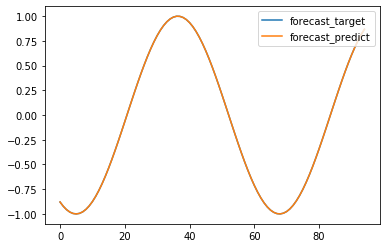

In [15]:
plt.plot(validation_target, label = 'forecast_target')
plt.plot(validation_predict, label = 'forecast_predict')

plt.legend()

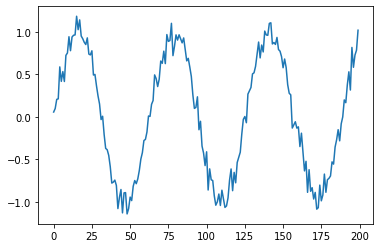

In [28]:
### 이제는 예쁜 싸인 곡선에다가 노이즈를 넣어보자. 


series2 = np.sin(0.1 * np.arange(200)) + np.random.randn(200) *0.1 #일정한 랜덤 값을 더해서 노이즈를 준다. 

plt.plot(series2)
plt.show()

In [33]:
T = 10 #과거데이터 10개
X = []
Y =[]
for t in range(len(series) - T):
    x = series2[t:t+T]
    y = series2[t+T] #10번째 데이터만 저장함. 
    X.append(x)
    Y.append(y)
    

In [34]:
print(X[0],"------------Y:",Y[0])
print(X[1])

[0.05786036 0.09907859 0.20687815 0.21306054 0.58847713 0.41849868
 0.53337516 0.41679819 0.72402069 0.75238819] ------------Y: 0.9431118321320419
[0.09907859 0.20687815 0.21306054 0.58847713 0.41849868 0.53337516
 0.41679819 0.72402069 0.75238819 0.94311183]


In [35]:
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape",Y.shape)

#10개데이터가 feature로 들어가서 학습이 됨. 

X.shape (190, 10) Y.shape (190,)


In [36]:
# autoregressive linear model

i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.1))
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [37]:
#190 -> 0~95
r=model.fit(X[:-N//2], Y[:-N//2], epochs=100, validation_data=((X[-N//2:], Y[-N//2:])))

Train on 95 samples, validate on 95 samples
Epoch 1/100
95/95 [==============================] - 0s 2ms/sample - loss: 0.5722 - val_loss: 0.2974
Epoch 2/100
95/95 [==============================] - 0s 151us/sample - loss: 0.4293 - val_loss: 0.1536
Epoch 3/100
95/95 [==============================] - 0s 157us/sample - loss: 0.0846 - val_loss: 0.1014
Epoch 4/100
95/95 [==============================] - 0s 168us/sample - loss: 0.1784 - val_loss: 0.1399
Epoch 5/100
95/95 [==============================] - 0s 157us/sample - loss: 0.1028 - val_loss: 0.0425
Epoch 6/100
95/95 [==============================] - 0s 168us/sample - loss: 0.0634 - val_loss: 0.1032
Epoch 7/100
95/95 [==============================] - 0s 168us/sample - loss: 0.0814 - val_loss: 0.0369
Epoch 8/100
95/95 [==============================] - 0s 162us/sample - loss: 0.0320 - val_loss: 0.0656
Epoch 9/100
95/95 [==============================] - 0s 147us/sample - loss: 0.0549 - val_loss: 0.0453
Epoch 10/100
95/95 [===========

([<matplotlib.axis.YTick at 0x273d9a46608>],
 <a list of 1 Text yticklabel objects>)

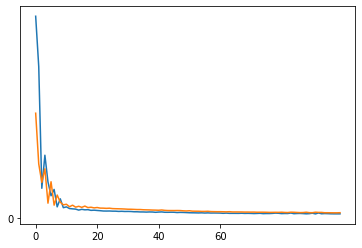

In [41]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.xticks(np.arange(0, 80, 20))
plt.yticks(np.arange(0,1))

In [42]:
validation_target = Y[-N//2:]
validation_predict = []

i = -N//2
while len(validation_predict) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1))[0,0] # 1X1 -> scalar

    i += 1
    validation_predict.append(p)

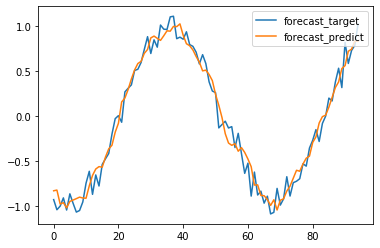

In [43]:
plt.plot(validation_target, label = 'forecast_target')
plt.plot(validation_predict, label = 'forecast_predict')

plt.legend()

#last_x를 제대로 변형하지 않은 것. 
#절반만가지고 학습했던걸 잘 맞췄는가

In [44]:
#correct
validation_target = Y[-N//2:]
validation_predict = []

last_x = X[-N//2]


i = -N//2
print("X[95]=", X[-N//2])
print("X[96]=", X[-N//2 +1])

while len(validation_predict) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0] # 1X1 -> scalar
    
    validation_predict.append(p)
    
    print("new X=", X[i], ", p=",p)
    i+=1
    
    # p -> predict value
#     last_x = [] #new caculated value
    #[A,B,C,D,....,X]
    #[B,C,D,.....,X, [A,B,C,D,....,X] ]
    #last_x(last value) -> p
    
     # np.roll()
    print("Before:", last_x)
    last_x = np.roll(last_x, -1)
    print("After:", last_x)
    last_x[-1] = p 

X[95]= [-0.15028126 -0.05099477 -0.34204457 -0.4240014  -0.57158079 -0.4095492
 -0.85889617 -0.61018757 -0.73913343 -0.74693828]
X[96]= [-0.05099477 -0.34204457 -0.4240014  -0.57158079 -0.4095492  -0.85889617
 -0.61018757 -0.73913343 -0.74693828 -0.92540857]
new X= [-0.15028126 -0.05099477 -0.34204457 -0.4240014  -0.57158079 -0.4095492
 -0.85889617 -0.61018757 -0.73913343 -0.74693828] , p= -0.82737404
Before: [-0.15028126 -0.05099477 -0.34204457 -0.4240014  -0.57158079 -0.4095492
 -0.85889617 -0.61018757 -0.73913343 -0.74693828]
After: [-0.05099477 -0.34204457 -0.4240014  -0.57158079 -0.4095492  -0.85889617
 -0.61018757 -0.73913343 -0.74693828 -0.15028126]
new X= [-0.05099477 -0.34204457 -0.4240014  -0.57158079 -0.4095492  -0.85889617
 -0.61018757 -0.73913343 -0.74693828 -0.92540857] , p= -0.78921384
Before: [-0.05099477 -0.34204457 -0.4240014  -0.57158079 -0.4095492  -0.85889617
 -0.61018757 -0.73913343 -0.74693828 -0.82737404]
After: [-0.34204457 -0.4240014  -0.57158079 -0.4095492  -

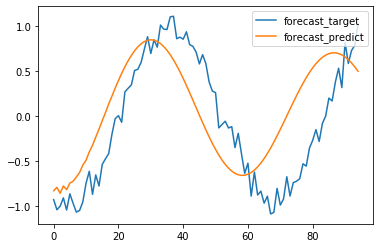

In [45]:
plt.plot(validation_target, label = 'forecast_target')
plt.plot(validation_predict, label = 'forecast_predict')

plt.legend()